In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
cancer = load_breast_cancer()

In [3]:
#### feature를 컬럼으로 DataFrame 생성

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [4]:
## train_test_split 함수를 이용해서 cancer와 target을 섞는다..비율은 8:2 , random_state = 0
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=0)
## RandomForestClassifier 모델 생성(모델명 forest). 결정트리갯수는 100
forest = RandomForestClassifier(n_estimators=100, random_state=0)

## 학습시킴
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [5]:
feature_size = len(data_df.columns)
feature_size

30

In [6]:
## Training DataSet Accuracy, Test DataSet Accuracy를 출력함
print('Training DataSet Accuracy : ', forest.score(X_train, y_train))
print('Test DataSet Accuracy : {}'.format(round(forest.score(X_test, y_test), 3)))

Training DataSet Accuracy :  1.0
Test DataSet Accuracy : 0.965


In [7]:
## 하이퍼 파라미터값을 지정...오버핏팅이 줄어들고 정확도가 올라가는 값으로 지정하자
## 데이타의 단순성 때문에 Test 정확도가 함께 내려갈 가능성도 있음
## max_features=?
## max_depth=?

forest = RandomForestClassifier(n_estimators=100, max_features=10, max_depth=5, random_state=0)
forest.fit(X_train, y_train)
print(forest.score(X_train, y_train))
print(round(forest.score(X_test, y_test), 3))

0.9956043956043956
0.974


In [8]:
# 특성 중요도 출력하기
max_feature = forest.feature_importances_.max()
sum_feature = forest.feature_importances_.sum()
# print('특성 중요도 : \n[{0:0.8f} {1:0.8f}]'.format(sum_feature-max_feature, max_feature))
print('특성 중요도 : \n{}'.format(np.array([sum_feature-max_feature, max_feature])))

특성 중요도 : 
[0.75051014 0.24948986]


<AxesSubplot:>

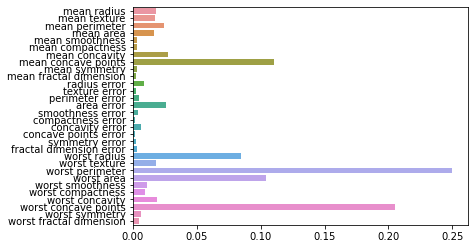

In [9]:
## 특성 중요도를 시각화하자.
# plt.bar(forest.feature_importances_, cancer.feature_names, width=0.)
sns.barplot(x= forest.feature_importances_, y=cancer.feature_names)

In [10]:
# 원본 함수
def plot_feature_importances(model):
    n_feature = cancer.data.shape[1]
    plt.figure(figsize=(10, 10))
    plt.barh(range(n_feature), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_feature), cancer.feature_names)
    plt.xlabel('Feature Importances')
    plt.ylabel('Feature')

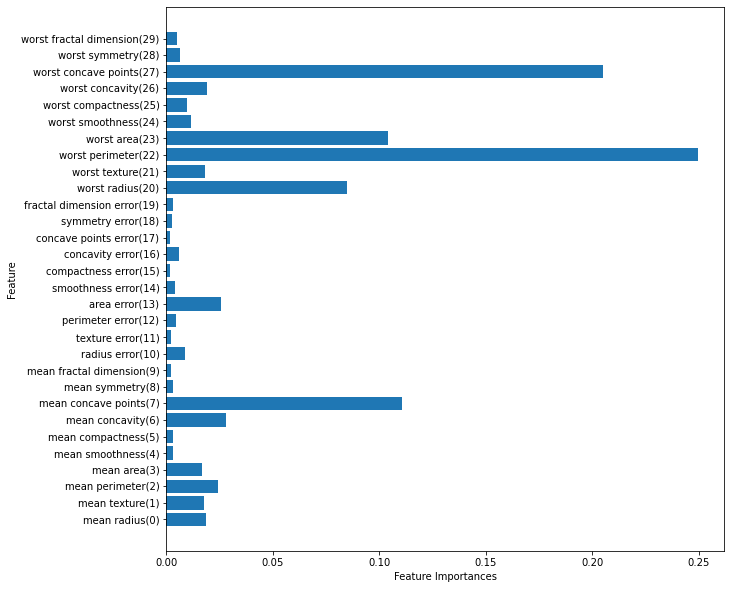

In [11]:
# y_label을 수정한 것
def plot_feature_importances(model):
    n_feature = cancer.data.shape[1]
    new_name = []
    for num, name in enumerate(cancer.feature_names) :
        new_name.append('{}({})'.format(name,num)) 
    plt.figure(figsize=(10, 10))
    plt.barh(range(n_feature), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_feature), new_name)
    plt.xlabel('Feature Importances')
    plt.ylabel('Feature')

plot_feature_importances(forest)

Text(0.5, 1.0, 'Feature Importances Top 10')

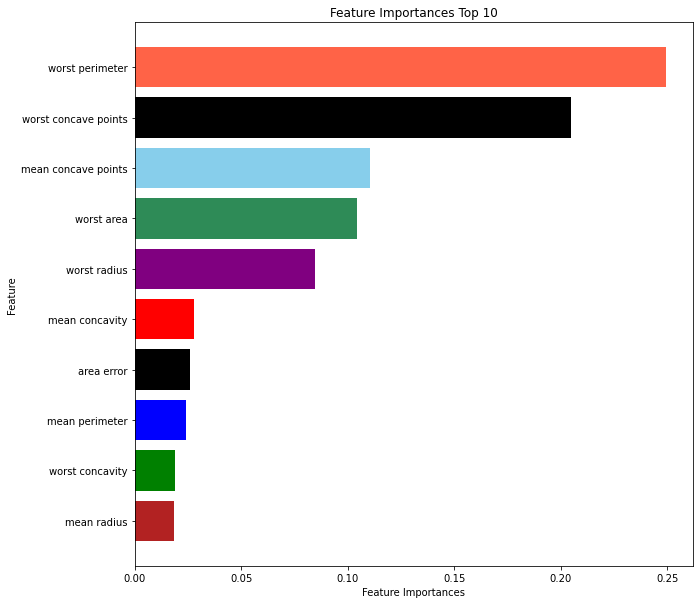

In [12]:
# 중요도 순으로 졍렬해서 시각화
# new_array = []
# for a,b in zip(new_name, forest.feature_importances_) :
#     k = new_array.append([a,b])
colors=['firebrick', 'green', 'blue', 'black', 'red', 'purple', 'seagreen', 'skyblue', 'black', 'tomato']
new_df = pd.DataFrame(forest.feature_importances_, cancer.feature_names)
data = new_df.sort_values(by=0).iloc[20:30]
plt.figure(figsize=(10, 10))
plt.barh(data.index, data[0], align='center', color=colors)
plt.xlabel('Feature Importances')
plt.ylabel('Feature')
plt.title('Feature Importances Top 10')
    
# plot_feature_importances(forest)

# colors=['firebrick', 'green', 'blue', 'black', 'red', 'purple', 'seagreen', 'skyblue', 'black', 'tomato']

### GridSearch를 사용해서 하이퍼 파라미터값 중에서 최적의 값을 찾아보자
<pre>
params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'n_estimators' : [10,50,100]
}
</pre>

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
params = {
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18],
    'n_estimators' : [10,50, 100]
}
clf_grid = GridSearchCV(RandomForestClassifier(random_state=0), param_grid=params)

clf_grid.fit(X_train, y_train)

# best hyperparameter를 찾아준다.
print('Best Parameter : ', clf_grid.best_params_)
print('Best Estimators : ', clf_grid.best_estimator_)

Best Parameter :  {'max_depth': 6, 'min_samples_leaf': 8, 'n_estimators': 100}
Best Estimators :  RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=0)


In [15]:
# max_depths = [1,3,4,6,10,15] 값이 변화됨에 따라서 정확도가 커지는 관계를 출력해보자
max_depth =  [1,3,4,6,10,15] 
for i in max_depth :
    forest = RandomForestClassifier(n_estimators=100, max_depth=i, min_samples_leaf=8, random_state=0)
    forest.fit(X_train, y_train)
    score = forest.score(X_test, y_test)
    print('max_depth={} 정확도  :{}'.format(i, round(score, 4)))

max_depth=1 정확도  :0.9561
max_depth=3 정확도  :0.9649
max_depth=4 정확도  :0.9561
max_depth=6 정확도  :0.9649
max_depth=10 정확도  :0.9649
max_depth=15 정확도  :0.9649
